In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.distributions as D
import torchvision.transforms as T
from torch.utils.data import DataLoader

import numpy as np

from itertools import repeat

import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2
import sys
sys.path.append("../src")
from modules import WaveletNet, LazyWavelet, Lifting, Wavelet, FlattenLatents
from datasets import fetch_dataset

# Generate toy dataset -- sample from bivariate normal distribution with mean 0.

In [2]:
x_sample = fetch_dataset('BivariateNormal')

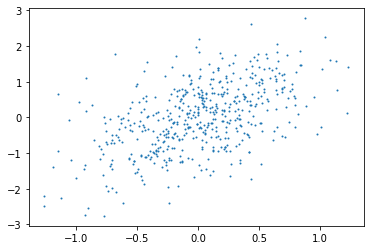

In [12]:
plt.scatter(x_sample[:, 0], x_sample[:, 1], s=1)

# Create normalizing flow model

In [4]:
model = WaveletNet([[[1, 1]]])

optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)

step = 0

In [6]:
dataloader = DataLoader(dataset=torch.cat(list(repeat(x_sample, 1_000))), batch_size=512)

# Train model

In [7]:
for i, x in enumerate(dataloader):
    global step
    step += 1
    loss = - model.log_prob(x).mean()
    optimizer.zero_grad()
    loss.backward()
    nn.utils.clip_grad_norm_(model.parameters(), 50)
    optimizer.step()
    if i % 100 == 0:
        with torch.no_grad():
            print(f"Step {i}. Loss: {loss}")

Step 0. Loss: 2.384687662124634
Step 100. Loss: 2.348573684692383
Step 200. Loss: 2.3271255493164062
Step 300. Loss: 2.313568592071533
Step 400. Loss: 2.303807020187378
Step 500. Loss: 2.296034812927246
Step 600. Loss: 2.289609432220459
Step 700. Loss: 2.2842788696289062
Step 800. Loss: 2.27988338470459
Step 900. Loss: 2.276289939880371


# Visualize the distribution that the model fits

## Sample latent variables

In [24]:
with torch.no_grad():
    z = model.base_dist.sample((512,2))
    x = model.inverse(z)[0].detach().numpy()

# Plot latent variables

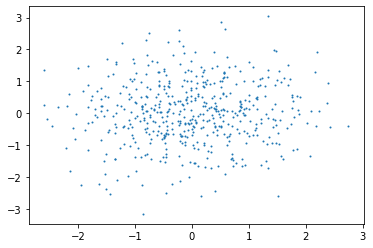

In [25]:
 plt.scatter(z[:,0], z[:,1], s=1)

## Plot model fit (transformed latent variables)

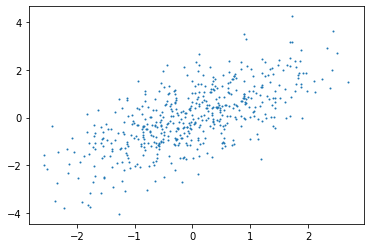

In [26]:
plt.scatter(x[:,0], x[:,1], s=1)